1000
1000


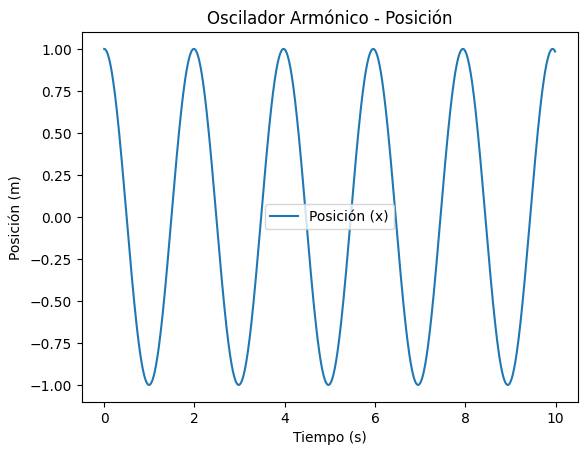

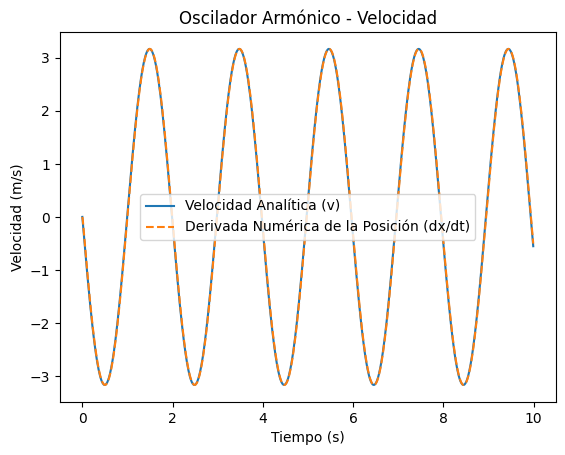

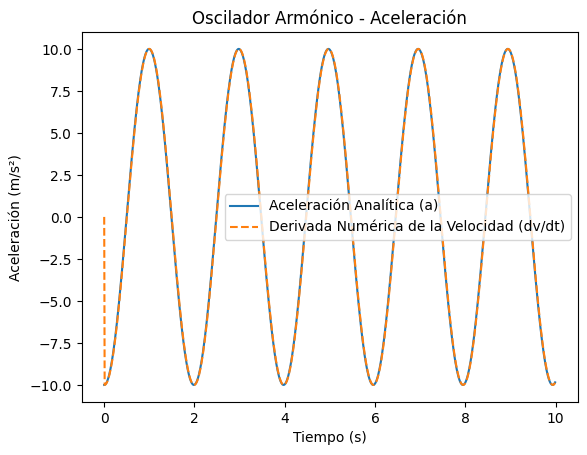

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
m = 1.0      # Masa (kg)
k = 10.0     # Constante del resorte (N/m)
x0 = 1.0     # Posición inicial (m)
v0 = 0.0     # Velocidad inicial (m/s)

# Calcular la frecuencia angular
omega_0 = np.sqrt(k / m)

# Intervalo de tiempo
T = 10.0             # Tiempo total de simulación (s)
dt = 0.01            # Paso de tiempo (s)
t = np.arange(0, T, dt)

# Calcular la posición en cada instante de tiempo
x = x0 * np.cos(omega_0 * t) + (v0 / omega_0) * np.sin(omega_0 * t)

# Calcular la velocidad analítica
v = -x0 * omega_0 * np.sin(omega_0 * t) + (v0) * np.cos(omega_0 * t)

# Derivar numéricamente la posición manualmente
x_deriv = np.zeros(len(t))
for i in range(1, len(t)):
    x_deriv[i] = (x[i] - x[i-1]) / dt
print(len(x_deriv))
print(len(x))
# Calcular la aceleración analítica
a = -x0 * omega_0**2 * np.cos(omega_0 * t) - (v0 * omega_0) * np.sin(omega_0 * t)

# Derivar numéricamente la velocidad manualmente
v_deriv = np.zeros(len(t))
for i in range(1, len(t)):
    v_deriv[i] = (v[i] - v[i-1]) / dt

# Graficar la posición
plt.figure()
plt.plot(t, x, label='Posición (x)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición (m)')
plt.title('Oscilador Armónico - Posición')
plt.legend()
plt.show()

# Graficar la velocidad analítica y la derivada numérica
plt.figure()
plt.plot(t, v, label='Velocidad Analítica (v)')
plt.plot(t, x_deriv, '--', label='Derivada Numérica de la Posición (dx/dt)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad (m/s)')
plt.title('Oscilador Armónico - Velocidad')
plt.legend()
plt.show()

# Graficar la aceleración analítica y la derivada numérica de la velocidad
plt.figure()
plt.plot(t, a, label='Aceleración Analítica (a)')
plt.plot(t, v_deriv, '--', label='Derivada Numérica de la Velocidad (dv/dt)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Aceleración (m/s²)')
plt.title('Oscilador Armónico - Aceleración')
plt.legend()
plt.show()


In [3]:

xx = x ** 2

# Crear array xx_deriv
xv = x*x_deriv

# Crear el array de unos (de la misma longitud que x)
ones = np.ones_like(x)

omega = np.column_stack((ones, x, xx, xv))


In [4]:
# Calcular la pseudoinversa de la matriz
omega_pinv = np.linalg.pinv(omega)

print("Matriz original omega_pinv:")
print(omega)
print("\nPseudoinversa de A:")
print(omega_pinv)

# Verificar la propiedad A @ A_pinv @ A ≈ A
print("\nVerificación de la propiedad A @ A_pinv @ A:")
print(np.allclose(omega @ omega_pinv @ omega, omega))

Matriz original omega_pinv:
[[ 1.          1.          1.          0.        ]
 [ 1.          0.99950004  0.99900033 -0.04997084]
 [ 1.          0.99800067  0.99600533 -0.14963773]
 ...
 [ 1.          0.99373659  0.98751242 -0.30173433]
 [ 1.          0.98970658  0.97951911 -0.39885324]
 [ 1.          0.98468694  0.96960837 -0.49427731]]

Pseudoinversa de A:
[[-9.76173084e-04 -9.72111147e-04 -9.60008814e-04 ... -9.25865772e-04
  -8.93793263e-04 -8.54061035e-04]
 [ 1.94990424e-03  1.94881735e-03  1.94570141e-03 ...  1.93721501e-03
   1.92932632e-03  1.91957136e-03]
 [ 3.90355693e-03  3.89736144e-03  3.87706452e-03 ...  3.81498328e-03
   3.75495879e-03  3.67967018e-03]
 [-3.31531954e-05 -7.33507267e-05 -1.53491475e-04 ... -2.75659858e-04
  -3.53583198e-04 -4.30078396e-04]]

Verificación de la propiedad A @ A_pinv @ A:
True


In [5]:
-omega_0**2

-10.000000000000002

In [6]:
# encontrar coeficientes con pseudoinverse obvio l2 norm
k = omega_pinv@v_deriv
k

array([-9.67844909e-03, -9.97901213e+00,  3.86882212e-02, -3.03256044e-04])

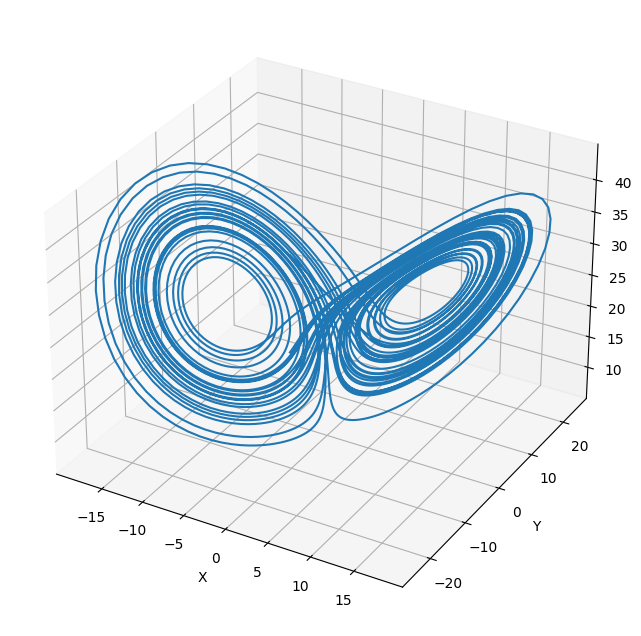

In [153]:
T = 40
dt = 0.01            
t = np.arange(0, T, dt)
sigma = 10
rho = 28
beta = 8/3


x = np.zeros(len(t))
y = np.zeros(len(t))
z = np.zeros(len(t))

# ecuaciones de lorenz
gamma = lambda x, y: sigma*(y - x)                # dx/dt
delta = lambda x, y, z: x*(rho - z) - y           # dy/dt
alfa = lambda x, y, z: x*y - beta*z             # dz/dt

#x, y, z, xx, xy, xz, yz, zz, yy

x[0] = -8
y[0] =  8
z[0] = 27

for i in range(1, len(t)):
    g1 = gamma(x[i-1],y[i-1])
    d1 = delta(x[i-1],y[i-1],z[i-1])
    a1 = alfa(x[i-1],y[i-1],z[i-1])
    
    g2 = gamma(x[i-1]+(dt/2)*g1, y[i-1]+(dt/2)*d1)
    d2 = delta(x[i-1]+(dt/2)*g1, y[i-1]+(dt/2)*d1, z[i-1]+(dt/2)*a1)
    a2 = alfa(x[i-1]+(dt/2)*g1, y[i-1]+(dt/2)*d1, z[i-1]+(dt/2)*a1)
    
    g3 = gamma(x[i-1]+(dt/2)*g2, y[i-1]+(dt/2)*d2)
    d3 = delta(x[i-1]+(dt/2)*g2, y[i-1]+(dt/2)*d2, z[i-1]+(dt/2)*a2)
    a3 = alfa(x[i-1]+(dt/2)*g2, y[i-1]+(dt/2)*d2, z[i-1]+(dt/2)*a2)
    
    g4 = gamma(x[i-1]+ dt*g3, y[i-1]+dt*d3)
    d4 = delta(x[i-1]+ dt*g3, y[i-1]+dt*d3, z[i-1]+dt*a3)
    a4 = alfa(x[i-1]+dt*g3, y[i-1]+dt*d3, z[i-1]+dt*a3)
    
    x[i] = x[i-1] + (dt/6)*(g1+2*g2+2*g3+g4)
    y[i] = y[i-1] + (dt/6)*(d1+2*d2+2*d3+d4)
    z[i] = z[i-1] + (dt/6)*(a1+2*a2+2*a3+a4)

    
# Graficar el espacio de fases en 3D usando matplotlib
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z,)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()



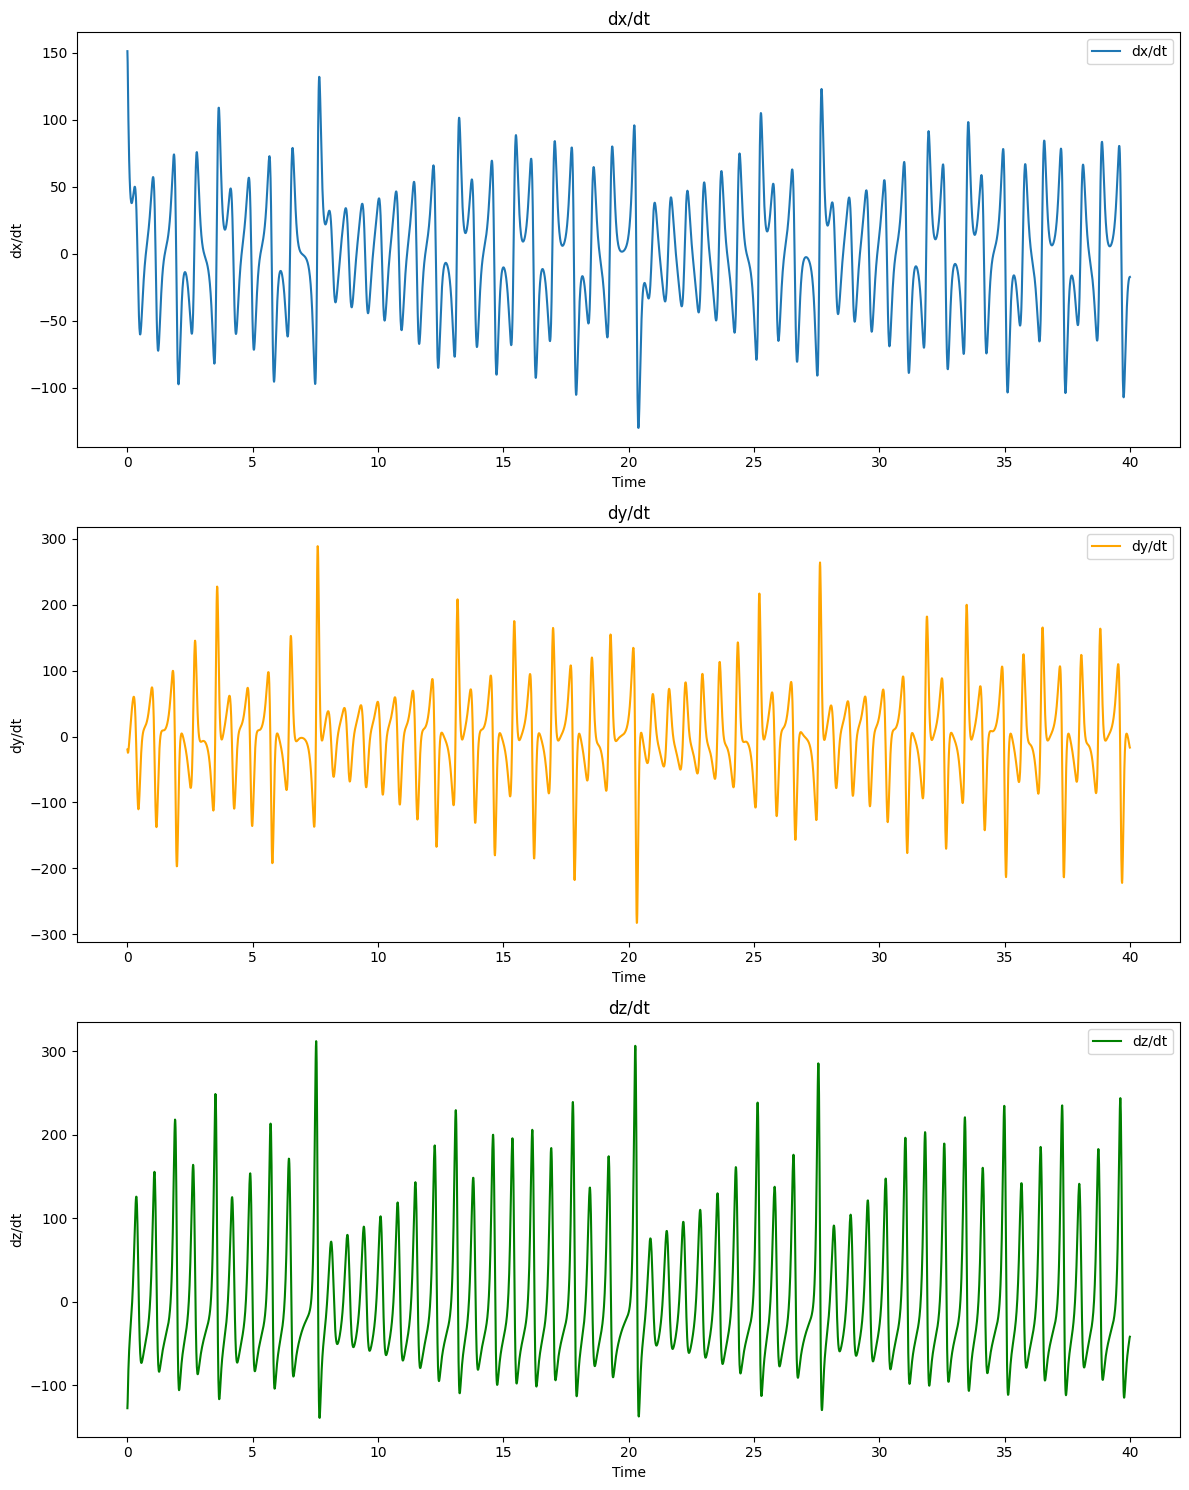

In [154]:
# Supongo que estas son las derivadas correctas del sistema 
dxdt = np.gradient(x, t) 
dydt = np.gradient(y, t) 
dzdt = np.gradient(z, t)  

fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Graficar dx/dt
axs[0].plot(t, dxdt, label='dx/dt')
axs[0].set_title('dx/dt')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('dx/dt')
axs[0].legend()

# Graficar dy/dt
axs[1].plot(t, dydt, label='dy/dt', color='orange')
axs[1].set_title('dy/dt')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('dy/dt')
axs[1].legend()

# Graficar dz/dt
axs[2].plot(t, dzdt, label='dz/dt', color='green')
axs[2].set_title('dz/dt')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('dz/dt')
axs[2].legend()

plt.tight_layout()
plt.show()

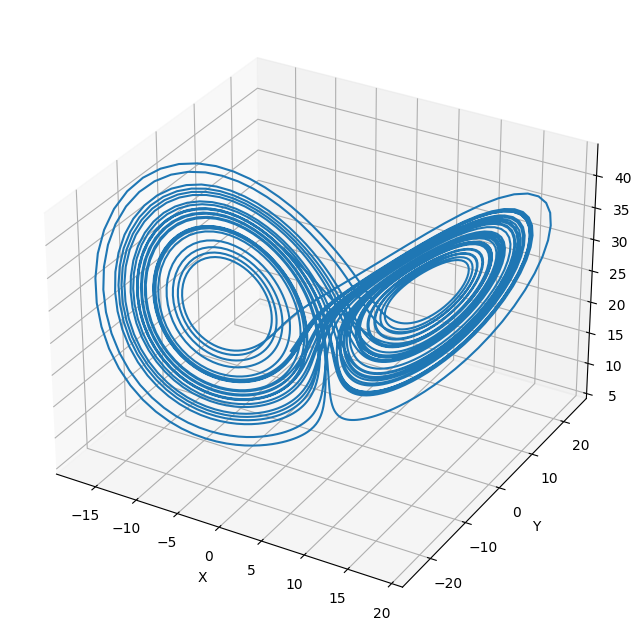

In [156]:
# nada más hice esto para comprobar que dxdt con np.gradient es correcto

# Valores iniciales
x0 = -8
y0 = 8
z0 = 27

# Inicializar arrays para x, y, z
x_num = np.zeros_like(t)
y_num = np.zeros_like(t)
z_num = np.zeros_like(t)

# Asignar las condiciones iniciales
x_num[0] = x0
y_num[0] = y0
z_num[0] = z0

# Integrar usando el método de Euler
for i in range(1, len(t)):
    x_num[i] = x_num[i-1] + dxdt[i-1] * dt
    y_num[i] = y_num[i-1] + dydt[i-1] * dt
    z_num[i] = z_num[i-1] + dzdt[i-1] * dt


fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_num, y_num, z_num,)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()


In [157]:
#Ahora que ya tengo x,y,z y sus derivadas, puedo proceder a aplicar SINDY, primero preparare
PHI = np.column_stack((dxdt, dydt, dzdt)) # mi matriz de derivadas

#preparo mis posibles soluciones será beta
xx = x*x
xy = x*y
xz = x*z
yz = y*z
zz = z*z
yy = y*y

BETA = np.column_stack((x, y, z, xx, xy, xz, yz, zz, yy))

#ahora preparo mi matriz de coeficientes a encontrar llamada C s.t BETA*C=PHI por tanto C=BETA_pinv*PHI
BETA_pinv = np.linalg.pinv(BETA)

# Verificar la propiedad A @ A_pinv @ A ≈ A
print("\nVerificar pseudoinv")
print(np.allclose(BETA @ BETA_pinv @ BETA, BETA))



Verificar pseudoinv
True


In [305]:
determinante = np.linalg.det(BETA)
print(determinante)

LinAlgError: Last 2 dimensions of the array must be square

In [158]:
# encontramos la matriz de coeficientes para obtener el modelo
C = BETA_pinv@PHI
C

array([[-1.00952719e+01,  2.77482249e+01,  1.99734170e-02],
       [ 1.00646717e+01, -9.22059426e-01, -1.17513368e-02],
       [-4.34186971e-03, -6.30545083e-04, -2.62283233e+00],
       [-2.62745474e-03, -1.50964811e-03,  2.30755602e-02],
       [ 3.10661638e-03,  1.98737630e-03,  9.72412192e-01],
       [ 3.54438606e-03, -9.92826925e-01, -5.17756271e-04],
       [-2.83195169e-03, -1.29813064e-03,  3.17217738e-04],
       [ 2.46839324e-04,  8.67934182e-05, -2.12926818e-03],
       [-1.00952199e-03, -7.70827960e-04,  7.23014104e-03]])

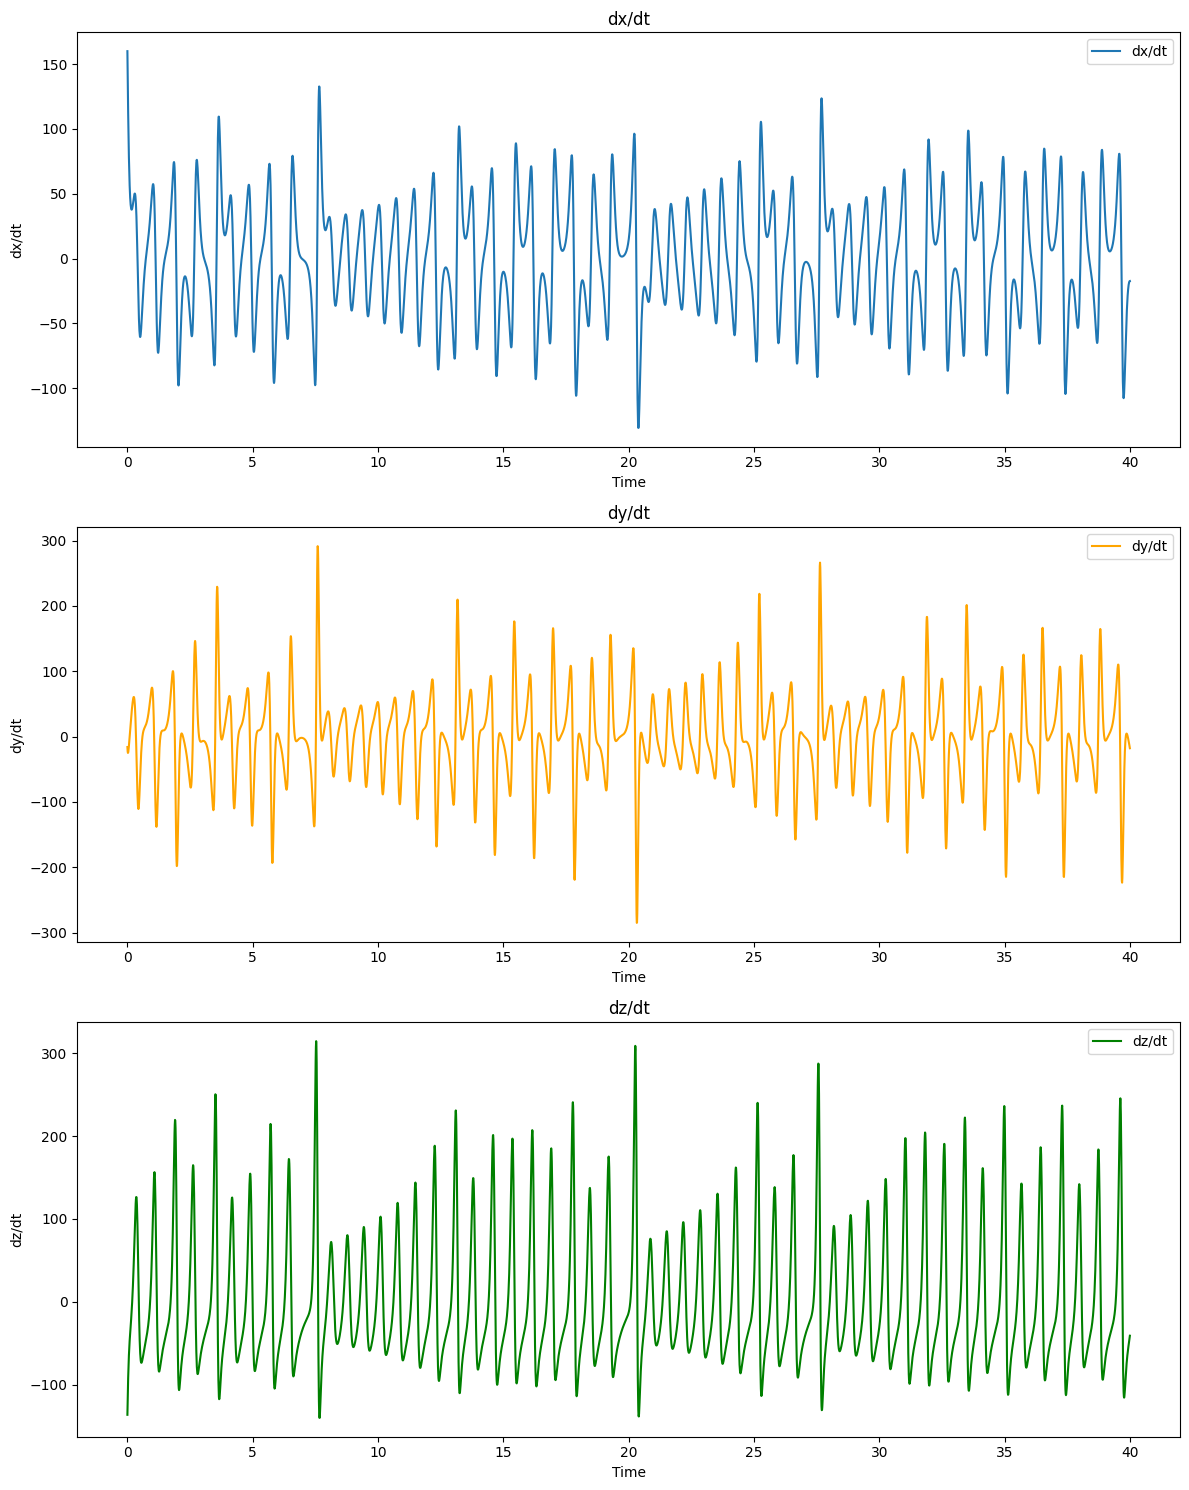

In [270]:
R0=np.dot(BETA,C)

x_p = R[:, 0]
y_p = R[:, 1]
z_p = R[:, 2]

fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Graficar dx/dt
axs[0].plot(t, x_p, label='dx/dt')
axs[0].set_title('dx/dt')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('dx/dt')
axs[0].legend()

# Graficar dy/dt
axs[1].plot(t, y_p, label='dy/dt', color='orange')
axs[1].set_title('dy/dt')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('dy/dt')
axs[1].legend()

# Graficar dz/dt
axs[2].plot(t, z_p, label='dz/dt', color='green')
axs[2].set_title('dz/dt')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('dz/dt')
axs[2].legend()

plt.tight_layout()
plt.show()

# POR LO TANTO VEMOS QUE LA PSEUDOINVERSa casi least sqaures, no genera una buena solucion, de hecho sobre ajusta

In [252]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.04, max_iter=10000) # 0.04 se ajustó bien

# Ajustar el modelo a los datos
lasso.fit(BETA, PHI)

# Obtener los coeficientes
coeficientes = lasso.coef_  # Esto es el vector de coeficientes C
coeficientes = coeficientes.T
intercepto = lasso.intercept_  # Esto es el término de intersección (no necesario para multiplicar)

# Ver el tipo y las dimensiones de los coeficientes
print("Tipo de coeficientes:", type(coeficientes))
print("Dimensiones de coeficientes:", coeficientes.shape)
print("Coeficientes:", coeficientes)


Tipo de coeficientes: <class 'numpy.ndarray'>
Dimensiones de coeficientes: (9, 3)
Coeficientes: [[-9.85103836e+00  2.75222634e+01  0.00000000e+00]
 [ 9.91062520e+00 -7.79081332e-01 -0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00 -2.44512317e+00]
 [-1.26970837e-05 -1.57500584e-03  4.36177206e-02]
 [ 2.46349963e-04  2.19372228e-03  9.55835600e-01]
 [-3.27554861e-03 -9.86502996e-01  7.94473930e-05]
 [ 1.48581293e-03 -5.32185106e-03 -7.37942964e-05]
 [-1.57861743e-05  7.56708644e-05 -7.13592663e-03]
 [-1.40391145e-04 -9.03700700e-04  9.68254630e-03]]


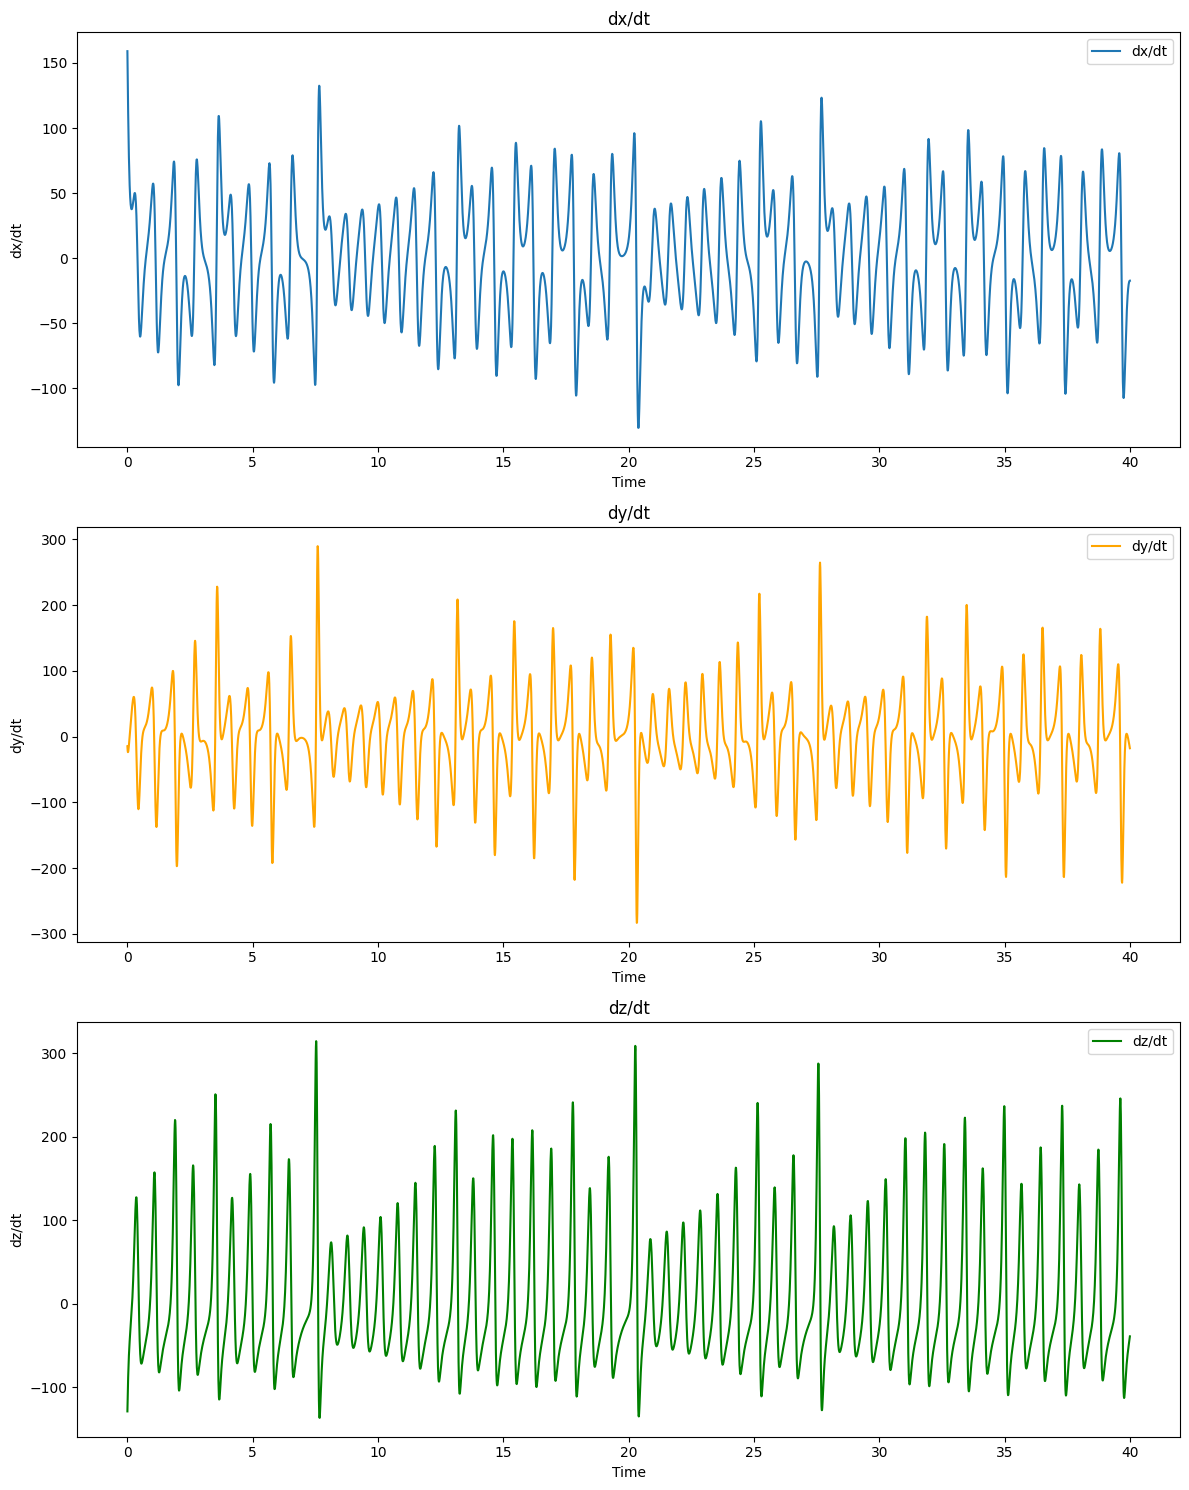

In [267]:
# esta seria la correcta
R1=np.dot(BETA,coeficientes)

x_p = R1[:, 0]
y_p = R1[:, 1]
z_p = R1[:, 2]



fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Graficar dx/dt
axs[0].plot(t, x_p, label='dx/dt')
axs[0].set_title('dx/dt')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('dx/dt')
axs[0].legend()

# Graficar dy/dt
axs[1].plot(t, y_p, label='dy/dt', color='orange')
axs[1].set_title('dy/dt')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('dy/dt')
axs[1].legend()

# Graficar dz/dt
axs[2].plot(t, z_p, label='dz/dt', color='green')
axs[2].set_title('dz/dt')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('dz/dt')
axs[2].legend()

plt.tight_layout()
plt.show()

In [253]:
import numpy as np

# Crear una matriz de ceros de tamaño 9x3
matrix = np.zeros((9, 3))

# Asignar los valores según las especificaciones
matrix[0, 0] = -10  # Primera columna, primer renglón
matrix[1, 0] = 10   # Primera columna, segundo renglón

matrix[0, 1] = 28   # Segunda columna, primer renglón
matrix[1, 1] = -1 # Segunda columna, renglones 2 a 6
matrix[5, 1] = -1 # Segunda columna, renglones 2 a 6

matrix[2, 2] = -8/3  # Tercera columna, tercer renglón
matrix[4, 2] = 1    # Tercera columna, quinto renglón

# Imprimir la matriz resultante
print(matrix)


[[-10.          28.           0.        ]
 [ 10.          -1.           0.        ]
 [  0.           0.          -2.66666667]
 [  0.           0.           0.        ]
 [  0.           0.           1.        ]
 [  0.          -1.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]
 [  0.           0.           0.        ]]


In [281]:
mean_err = np.mean(matrix - coeficientes)
print("Media error entre matriz de coefs correcta con lasso", mean_err) 
mean_err = np.mean(matrix - C)
print("Media error entre matriz de coefs correcta y pseudoinv", mean_err) 

Media error entre matriz de coefs correcta con lasso -0.0012063561325723986
Media error entre matriz de coefs correcta y pseudoinv 0.005587591979678137


In [255]:
i=8
j=2
print(matrix[i,j], coeficientes[i,j])

0.0 0.009682546303524206


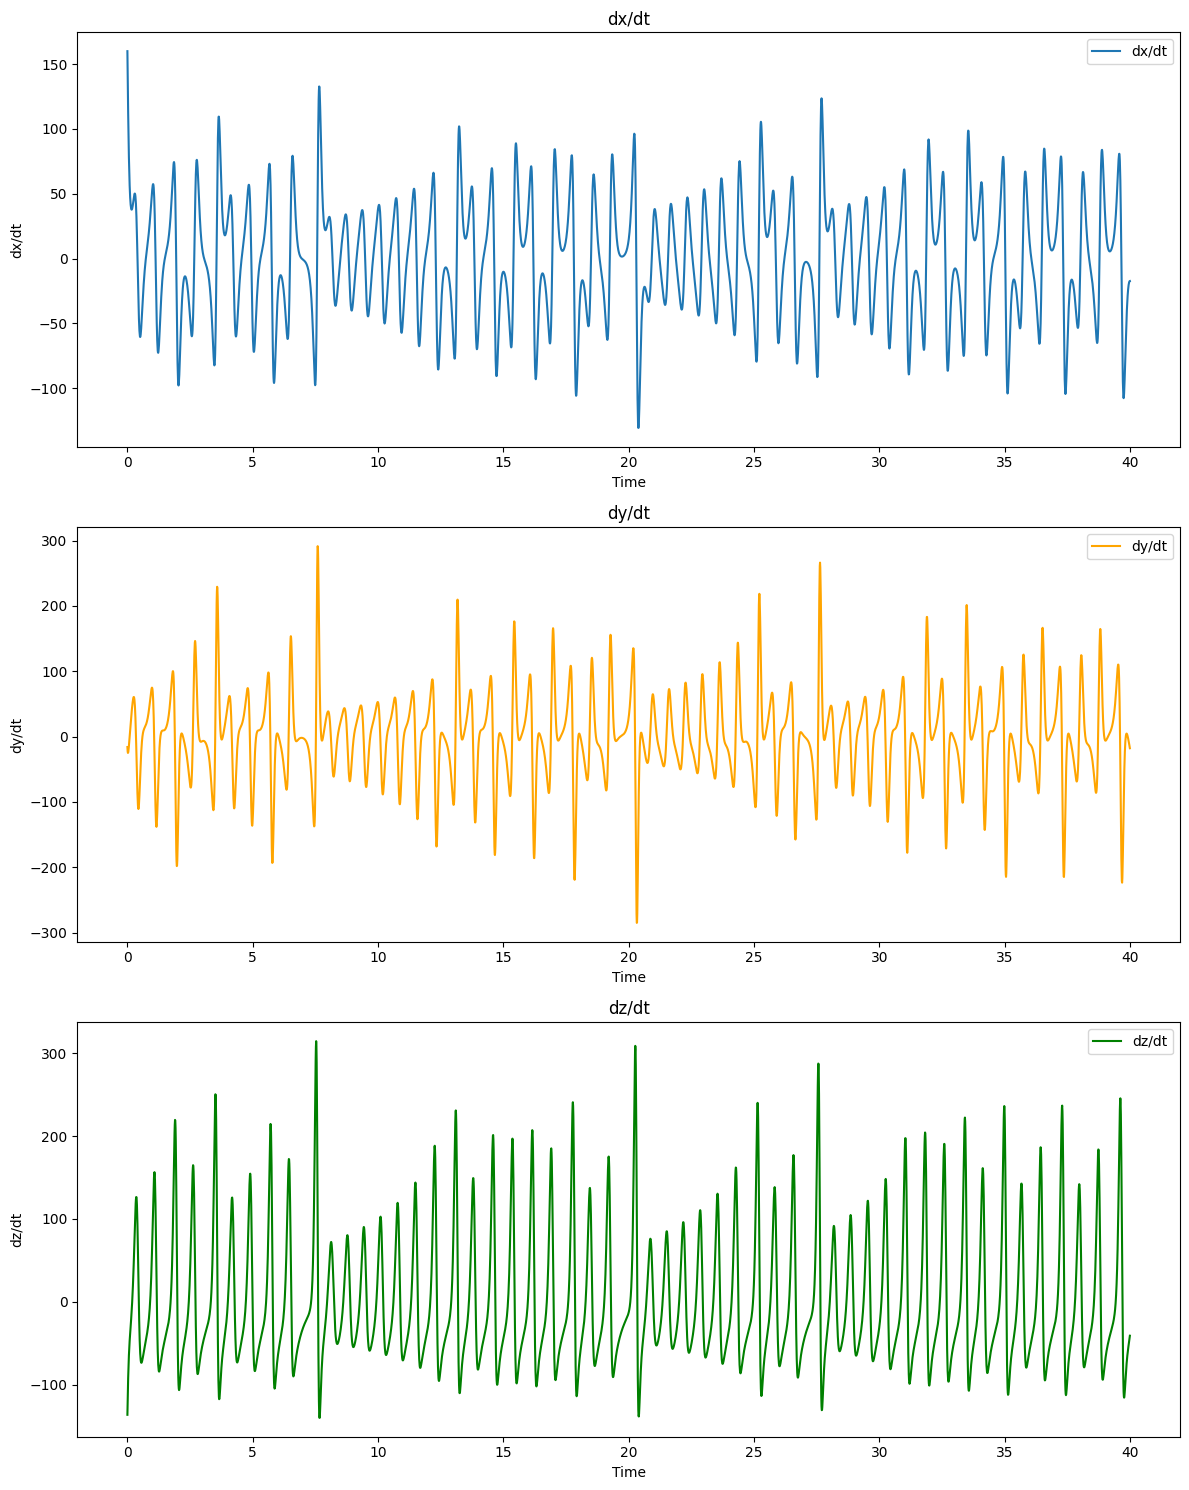

In [256]:
# esta seria la correcta
R=np.dot(BETA,matrix)

x_p = R[:, 0]
y_p = R[:, 1]
z_p = R[:, 2]



fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Graficar dx/dt
axs[0].plot(t, x_p, label='dx/dt')
axs[0].set_title('dx/dt')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('dx/dt')
axs[0].legend()

# Graficar dy/dt
axs[1].plot(t, y_p, label='dy/dt', color='orange')
axs[1].set_title('dy/dt')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('dy/dt')
axs[1].legend()

# Graficar dz/dt
axs[2].plot(t, z_p, label='dz/dt', color='green')
axs[2].set_title('dz/dt')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('dz/dt')
axs[2].legend()

plt.tight_layout()
plt.show()

In [272]:
normR = np.linalg.norm(R, 'fro')
print("Norma Frobenius:", normR) 

Norma Frobenius: 7114.5643906966925


In [273]:
normR1 = np.linalg.norm(R1, 'fro')
print("Norma Frobenius:", normR1) 

Norma Frobenius: 7091.475755923002


In [274]:
normR0 = np.linalg.norm(R0, 'fro')
print("Norma Frobenius:", normR0) 

Norma Frobenius: 7092.303102522364


In [280]:
normRR0 = np.linalg.norm(R-R0, 'fro')
print("Norma Frobenius:", normRR0) 
normRR1 = np.linalg.norm(R-R1, 'fro')
print("Norma Frobenius:", normRR1) 

mean_err = np.mean(R - R1)
print("Media error entre modelo con lasso y el correcto", mean_err) 
mean_err = np.mean(R - R0)
print("Media error entre modelo con least sqs y real", mean_err) 

Norma Frobenius: 28.039997663566282
Norma Frobenius: 99.85849929934139
Media error entre modelo con lasso y el correcto -0.49417946314922384
Media error entre modelo con least sqs y real 0.0002452347089328034


0.005723692795987283


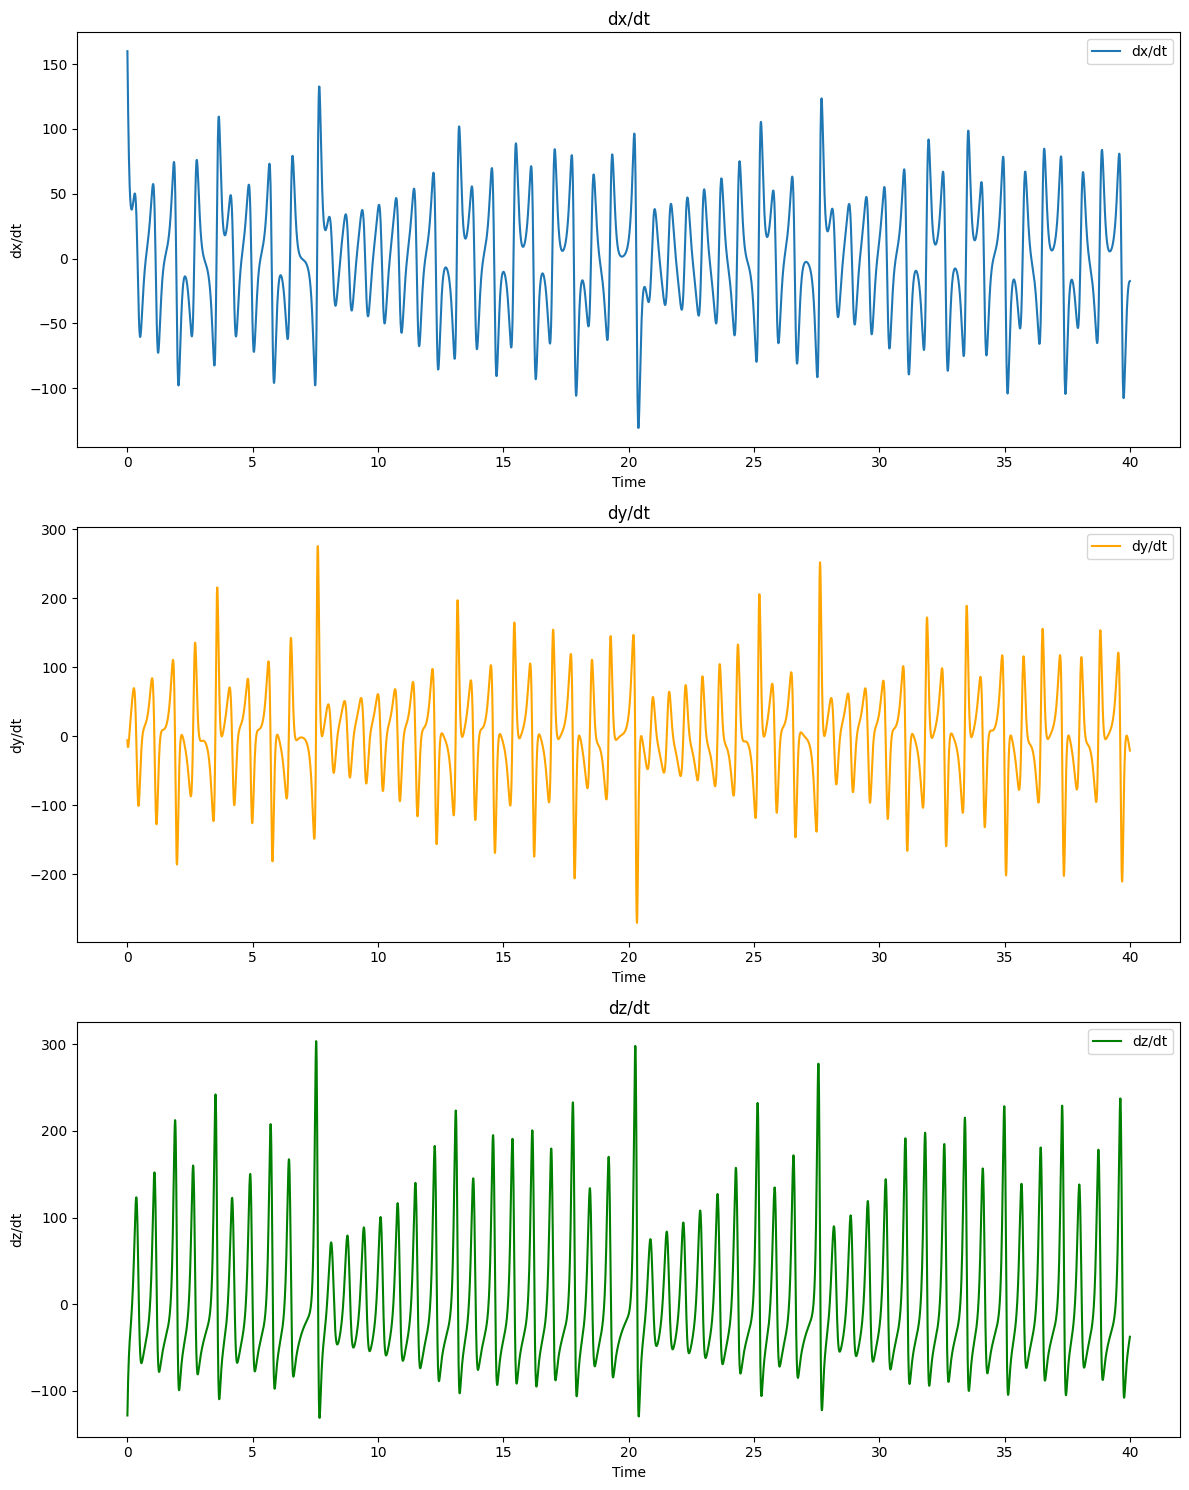

array([[-10.00045498,  26.98382829,   0.        ],
       [ 10.00556536,   0.        ,   0.        ],
       [  0.        ,   0.        ,  -2.48909489],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.95955365],
       [  0.        ,  -0.9715244 ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ]])

In [298]:
# si despreciaramos todos los valores menores a 0.7 asbolutos, en coeficientes
coeficientes[np.abs(coeficientes) < 0.5] = 0
print(np.mean(coeficientes - matrix))

# vuelvo a calcular el modelo
R3=np.dot(BETA,coeficientes)

x_p = R3[:, 0]
y_p = R3[:, 1]
z_p = R3[:, 2]



fig, axs = plt.subplots(3, 1, figsize=(12, 15))

# Graficar dx/dt
axs[0].plot(t, x_p, label='dx/dt')
axs[0].set_title('dx/dt')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('dx/dt')
axs[0].legend()

# Graficar dy/dt
axs[1].plot(t, y_p, label='dy/dt', color='orange')
axs[1].set_title('dy/dt')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('dy/dt')
axs[1].legend()

# Graficar dz/dt
axs[2].plot(t, z_p, label='dz/dt', color='green')
axs[2].set_title('dz/dt')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('dz/dt')
axs[2].legend()

plt.tight_layout()
plt.show()
coeficientes

In [285]:
mean_err = np.mean(R - R3)
print("Media error entre modelo con lasso y el correcto", mean_err) 

Media error entre modelo con lasso y el correcto -0.8663289215898681
